<h1><center>MDI343 / MDI724 - TP1 Avazu<center></h1>

#### For any remark or suggestion, please feel free to contact us at: 
#### pascal.bianchi@telecom-paristech.fr
#### nidham.gazagnadou@telecom-paristech.fr
#### kevin.elgui@gmail.com



## First name : Weijia
## Last name : DU

## First name : Pakiradhaan
## Last name : PARAMESWARAN

## Email : weijia.dudu@gmail.com, pakiradhaan@gmail.com

<font color="red">**Question 0:**
    Import the needed packages: numpy, pandas etc..
</font>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
%matplotlib inline

# The dataset

<font color="red">**Question 1:**
    Load the data into a pandas DataFrame and display the first lines with the ".head()" method.
    <br>
</font>
**Remark**: the features meaning is available at https://www.kaggle.com/c/avazu-ctr-prediction/data

In [2]:
df = pd.read_csv('/home/weijia/machine_learning/TP8/train-1000000')

In [3]:
df.head()

,id,click,hour,C1,banner_pos,site_id,site_domain,site_category,app_id,app_domain,...,device_type,device_conn_type,C14,C15,C16,C17,C18,C19,C20,C21
0,3.983206e+18,0,14102915,1005,1,e151e245,7e091613,f028772b,ecad2386,7801e8d9,...,1,2,4687,320,50,423,2,39,100148,32
1,7.756884e+18,0,14103007,1002,0,cb809abf,74acf31a,50e219e0,ecad2386,7801e8d9,...,0,0,17894,320,50,2039,2,39,100077,32
2,6.941774e+17,0,14102711,1005,0,85f751fd,c4e18dd6,50e219e0,e9739828,df32afa9,...,1,0,22684,320,50,2619,1,163,100055,71
3,2.664154e+18,1,14102903,1005,0,85f751fd,c4e18dd6,50e219e0,a5184c22,b8d325c3,...,1,0,23222,320,50,2676,0,35,100176,221
4,1.480510e+19,0,14102902,1005,1,791b5571,fd13bc73,f028772b,ecad2386,7801e8d9,...,1,0,8330,320,50,761,3,175,100081,23


<font color="red">**Question 2:**
    What is the 'click' frequency in the dataset?
    <br>
</font>

In [4]:
df['click'].groupby(df['click']).agg('count')

click
0    830029
1    169971
Name: click, dtype: int64

We note that the Avazu dataset is very unbalanced. The 'click' class represents less than a fifth of the whole database. We already know that a classifier always predicting 'click'=0 will have good preformances in terms of error rate (around 0.17). The ROC and lift curves will be better performance metrics.

<font color="red">**Question 3:**
    What are the categorical features? Using the 'df.dtypes' method, compute the number of distincts values for each of these features.
</font>

In [5]:
df.dtypes

id                  float64
click                 int64
hour                  int64
C1                    int64
banner_pos            int64
site_id              object
site_domain          object
site_category        object
app_id               object
app_domain           object
app_category         object
device_id            object
device_ip            object
device_model         object
device_type           int64
device_conn_type      int64
C14                   int64
C15                   int64
C16                   int64
C17                   int64
C18                   int64
C19                   int64
C20                   int64
C21                   int64
dtype: object

In [6]:
df_features_count = df.nunique()
df_features_count

id                  1000000
click                     2
hour                    240
C1                        7
banner_pos                7
site_id                2651
site_domain            2871
site_category            22
app_id                 3157
app_domain              198
app_category             26
device_id            150501
device_ip            555248
device_model           5168
device_type               5
device_conn_type          4
C14                    2243
C15                       8
C16                       9
C17                     420
C18                       4
C19                      66
C20                     163
C21                      60
dtype: int64

<font color="red">**Question 4:**
    If one does a dummy encoding of all categorical variables, what would be the dimension of the model?
    In other words: what would be the dimension of our big feature vector encoded with dummies. 
    <br>
</font>

In [7]:
np.sum(df_features_count[1:])

723080

<font color="red">**Question 5:**
    Analyze the 'hour' column: which format is used? How can we transform/simply this feature?
</font>

In [8]:
#format is YYMMDDHH, so 14091123 means 23:00 on Sept. 11, 2014 UTC.

print(df['hour'].head()) # Fill here
print(df['hour'].tail()) # Fill here

0    14102915
1    14103007
2    14102711
3    14102903
4    14102902
Name: hour, dtype: int64
999995    14102602
999996    14102101
999997    14102318
999998    14102908
999999    14102600
Name: hour, dtype: int64


on pourra transformer cette colonnes en 4 colonnes:
- année 
- mois
- jour
- hour

<font color="red">**Question 6:**
    Run and understand the following script.
</font>

In [7]:
import datetime
def datesplit(originalDate):
    originalDate = str(originalDate)
    
    year = int("20" + originalDate[0:2])
    month = int(originalDate[2:4])
    day = int(originalDate[4:6])
    hour = int(originalDate[6:8])
    
    return datetime.datetime(year, month, day, hour)

# Exemple :
datesplit(14102915).weekday(), datesplit(14102915).hour

(2, 15)

Cette fonction permet de formater une date en un type de base pour la date et l'heure gérée par Python.
Pour ce faire, nous convertissons tout d'abord l'entrée en string, extrayons les deux premiers chiffres, concatenons avec '20' afin d'obtenir l'année en numérique.
Puis la même démarche est utilisée pour le mois, le jour et l'heure.
Enfin, nous obtenons un champ de format datetime en utilisant la fonction associée et en lui renseignant les éléments extraits précédemment. 

L'intérêt de conserver cette information sous ce format est l'accès à de nombreuses fonctionnalitées permises nativement par Python tel que le weekday ou l'heure.

- 14102915 weekday -> 2ème jour de la semaine
- 14102915 hour -> 15h


<font color="red">**Question 7:**
    Using the ".apply( ... )" method, create a 'weekday' for the day of the week. Then, replace the 'hour' column by the hour.
</font>

To answer this question you have to understand that applies takes a function as argument
<br>
"lambda x: ... " is used to create local unamed function of x
<br>
Check the documentation: https://docs.python.org/3/tutorial/controlflow.html#lambda-expressions

In [8]:
df['weekday'] = df['hour'].apply(lambda x : datesplit(x).weekday())
df['hour'] = df['hour'].apply(lambda x : datesplit(x).hour)

In [11]:
df.head()

,id,click,hour,C1,banner_pos,site_id,site_domain,site_category,app_id,app_domain,...,device_conn_type,C14,C15,C16,C17,C18,C19,C20,C21,weekday
0,3.983206e+18,0,15,1005,1,e151e245,7e091613,f028772b,ecad2386,7801e8d9,...,2,4687,320,50,423,2,39,100148,32,2
1,7.756884e+18,0,7,1002,0,cb809abf,74acf31a,50e219e0,ecad2386,7801e8d9,...,0,17894,320,50,2039,2,39,100077,32,3
2,6.941774e+17,0,11,1005,0,85f751fd,c4e18dd6,50e219e0,e9739828,df32afa9,...,0,22684,320,50,2619,1,163,100055,71,0
3,2.664154e+18,1,3,1005,0,85f751fd,c4e18dd6,50e219e0,a5184c22,b8d325c3,...,0,23222,320,50,2676,0,35,100176,221,2
4,1.480510e+19,0,2,1005,1,791b5571,fd13bc73,f028772b,ecad2386,7801e8d9,...,0,8330,320,50,761,3,175,100081,23,2


<font color="red">**Question 8:**
    Using the ".groupby( ... )" method, visualize the influence of the hour and of the day on the 'click' frequency. To do so, plot 'click' vs 'hour' and 'click' vs 'weekday' curves.
</font>

In [12]:
print(df.groupby(['hour','click']).agg({'click' : 'count'})) # Fill here for the influence of the hour
print(df.groupby(['weekday','click']).agg({'click' : 'count'})) # Fill here for the influence of the day

            click
hour click       
0    0      17137
     1       3831
1    0      20000
     1       4562
2    0      25083
     1       5341
3    0      28529
     1       6067
4    0      39600
     1       7524
5    0      40936
     1       7921
6    0      36492
     1       7438
7    0      37606
     1       8115
8    0      43698
     1       8536
9    0      47737
     1       9028
10   0      44348
     1       8612
11   0      42165
     1       8699
12   0      45157
     1       9358
13   0      49255
     1       9948
14   0      44730
     1       9691
15   0      41991
     1       9452
16   0      41070
     1       9020
17   0      41725
     1       8745
18   0      36082
     1       7082
19   0      27471
     1       5457
20   0      23489
     1       4421
21   0      20535
     1       3981
22   0      18436
     1       3692
23   0      16757
     1       3450
                click
weekday click        
0       0       65226
        1       14624
1       0   

In [9]:
df_click_hour = df.groupby(['hour','click'],as_index=False).count()[['hour','click','id']]
df_click_hour_1 = df_click_hour[df_click_hour['click']==1]
df_click_hour_0 = df_click_hour[df_click_hour['click']==0]

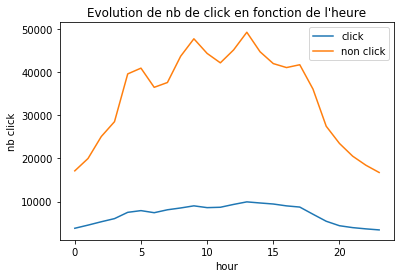

In [10]:
plt.plot(df_click_hour_1[['hour']],df_click_hour_1[['id']],label = 'click')
plt.plot(df_click_hour_0[['hour']],df_click_hour_0[['id']], label = 'non click')
plt.xlabel('hour')
plt.ylabel('nb click')
plt.legend()
plt.title("Evolution de nb de click en fonction de l'heure")
plt.show()

In [11]:
df_click_week = df.groupby(['weekday','click'],as_index=False).count()[['weekday','click','id']]
df_click_week
df_click_week_1 = df_click_week[df_click_week['click']==1]
df_click_week_0 = df_click_week[df_click_week['click']==0]

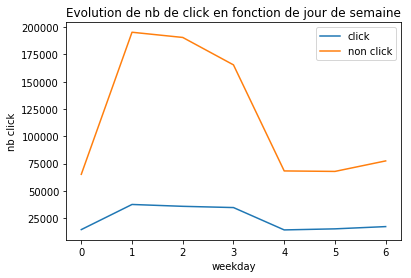

In [12]:
plt.plot(df_click_week_1[['weekday']],df_click_week_1[['id']],label = 'click')
plt.plot(df_click_week_0[['weekday']],df_click_week_0[['id']], label = 'non click')
plt.xlabel('weekday')
plt.ylabel('nb click')
plt.title('Evolution de nb de click en fonction de jour de semaine')
plt.legend()
plt.show()

<font color="red">**Question 9:**
    Explain what the axes stand for and try to interpret the shape of the obtained curves.
</font>

# Preliminary work and first model

Start by understanding the features with few modalities:
'hour', 'weekday', 'C1', 'banner_pos', 'site_category', 'app_category', 'device_type', 'device_conn_type', 'C15', 'C16', 'C18', 'C21'.

<font color="red">**Question 10:**
    For instance, inspect the columns 'C15' (dimension of the advert) and 'site_category': visualize the clicks mean.
</font>

In [22]:
df.groupby('C15').agg({'click':'mean'})

,click
C15,
120,0.033708
216,0.129612
300,0.360537
320,0.158767
480,0.285714
728,0.054144
768,0.375000
1024,0.166667


In [23]:
df.groupby('site_category').agg({'click':'mean'})

,click
site_category,
0569f928,0.053613
28905ebd,0.208076
335d28a8,0.089824
3e814130,0.284245
42a36e14,0.225806
50e219e0,0.128597
5378d028,0.000000
70fb0e29,0.144737
72722551,0.059172


<font color="red">**Question 11:**
    Some site categories have a null click rate. Why? Display the 'count()' of each modality.
    <br><br>
    Hint: you can use the method ".value_counts()"
</font>

In [24]:
df['site_category'].value_counts()

50e219e0    408921
f028772b    313339
28905ebd    182020
3e814130     75667
f66779e6      6365
75fa27f6      4007
335d28a8      3351
76b2941d      2573
c0dd3be3      1026
72722551       676
dedf689d       624
70fb0e29       608
0569f928       429
8fd0aea4       189
a818d37a        81
42a36e14        62
e787de0e        28
bcf865d9        16
5378d028        11
9ccfa2ea         5
da34532e         1
c706e647         1
Name: site_category, dtype: int64

In [114]:
list(df['site_category'].value_counts().keys)

TypeError: 'method' object is not iterable

<BarContainer object of 22 artists>

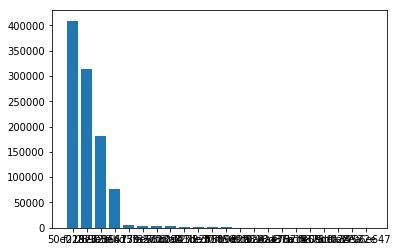

In [115]:
plt.bar(df['site_category'].value_counts().keys(), df['site_category'].value_counts())

It is practical to visualize both columns in parallel:

In [13]:
col = 'C1'
a = pd.DataFrame([df.groupby(col).mean()['click'], df.groupby(col).count()['click']]).transpose()
a.columns = ['mean', 'count']
a.sort_values(by='count', ascending=False)

,mean,count
C1,,
1005,0.169474,918606.0
1002,0.211157,54907.0
1010,0.095497,22409.0
1012,0.177295,2854.0
1007,0.035591,871.0
1001,0.027027,222.0
1008,0.106870,131.0


<font color="red">**Question 12:**
    Divide the dataset into a training (90%) and test set (10%) with sklearn (use the following option: random_state=100).
</font>

In [24]:
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(df.drop(['id', 'click'], axis=1), df['click'],test_size=0.1, random_state=100)

# First work on a reduced number of features

<font color="red">**Question 13:**
    Put in a list the selected columns: 'hour', 'weekday', 'C1', 'banner_pos', 'site_category', 'app_category', 'device_type', 'device_conn_type', 'C15', 'C16', 'C18', 'C21'.
</font>

In [25]:
some_columns = ['hour', 'weekday', 'C1', 'banner_pos', 'site_category', 'app_category', 
                'device_type', 'device_conn_type', 'C15', 'C16', 'C18', 'C21']

<font color="red">**Question 14:**
    <br>
    - Import OneHotEncoder from sklearn.preprocessing
    <br>
    - Transform the training and the test data restricted to the selected columns
    <br>
    - Give the type of the outputs.
</font>

In [23]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(handle_unknown='ignore')
Xtrain_oh = ohe.fit_transform(Xtrain[some_columns])
Xtest_oh = ohe.transform(Xtest[some_columns])

ValueError: could not convert string to float: '07d7df22'

<font color="red">**Question 15:**
    What is the new number of features?
</font>

In [123]:
Xtrain.shape

(750000, 23)

In [122]:
Xtrain_oh.shape

(750000, 182)

<font color="red">**Question 16:**
    Visualize the first row of the design matrix you have got.
</font>

In [137]:
ohe.get_feature_names()

array(['x0_0', 'x0_1', 'x0_2', 'x0_3', 'x0_4', 'x0_5', 'x0_6', 'x0_7',
       'x0_8', 'x0_9', 'x0_10', 'x0_11', 'x0_12', 'x0_13', 'x0_14',
       'x0_15', 'x0_16', 'x0_17', 'x0_18', 'x0_19', 'x0_20', 'x0_21',
       'x0_22', 'x0_23', 'x1_0', 'x1_1', 'x1_2', 'x1_3', 'x1_4', 'x1_5',
       'x1_6', 'x2_1001', 'x2_1002', 'x2_1005', 'x2_1007', 'x2_1008',
       'x2_1010', 'x2_1012', 'x3_0', 'x3_1', 'x3_2', 'x3_3', 'x3_4',
       'x3_5', 'x3_7', 'x4_0569f928', 'x4_28905ebd', 'x4_335d28a8',
       'x4_3e814130', 'x4_42a36e14', 'x4_50e219e0', 'x4_5378d028',
       'x4_70fb0e29', 'x4_72722551', 'x4_75fa27f6', 'x4_76b2941d',
       'x4_8fd0aea4', 'x4_9ccfa2ea', 'x4_a818d37a', 'x4_bcf865d9',
       'x4_c0dd3be3', 'x4_c706e647', 'x4_da34532e', 'x4_dedf689d',
       'x4_e787de0e', 'x4_f028772b', 'x4_f66779e6', 'x5_07d7df22',
       'x5_09481d60', 'x5_0bfbc358', 'x5_0f2161f8', 'x5_0f9a328c',
       'x5_18b1e0be', 'x5_2281a340', 'x5_2fc4f2aa', 'x5_4681bb9d',
       'x5_4ce2e9fc', 'x5_5326cf99', 'x5_7

In [129]:
Xtrain_oh.todense()[1,:]

matrix([[0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
         0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
         0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1.,
         0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0.]])

<font color="red">**Question 17:**
    Import and fit a logistic regression model on your the encoded data
</font>

In [30]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(solver='newton-cg', max_iter=500)
lr.fit(Xtrain_oh, ytrain)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=500, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='newton-cg',
          tol=0.0001, verbose=0, warm_start=False)

<font color="red">**Question 18:**
    With '.predict' and 'predict_proba', display the hard and soft decision you get on test data.
</font>

In [32]:
hard = lr.predict(Xtest_oh)
soft = lr.predict_proba(Xtest_oh)
print("hard : ",hard)
print("soft : ", soft)

hard :  [0 0 0 ... 0 0 0]
soft :  [[0.75808519 0.24191481]
 [0.73401283 0.26598717]
 [0.79691    0.20309   ]
 ...
 [0.79254169 0.20745831]
 [0.78564923 0.21435077]
 [0.87851889 0.12148111]]


<font color="red">**Question 19:**
    Compute the probability of **error** using sklearn.metrics 'accuracy_score' function. Comment.
    
</font>

In [33]:
from sklearn.metrics import accuracy_score
print(accuracy_score(ytest, hard))

0.83043


<font color="red">**Question 20:**
    Which sklearn.metrics could you also use?
</font>

In [38]:
from sklearn import metrics
fpr, tpr, thresholds = metrics.roc_curve(ytest, hard)
metrics.auc(fpr, tpr)

0.5033286118461706

<font color="red">**Question 21:**
    Plot the ROC curve. Then compute the log loss and the Area Under the Curve ROC.
</font>

In [39]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(ytest, soft.T[1])

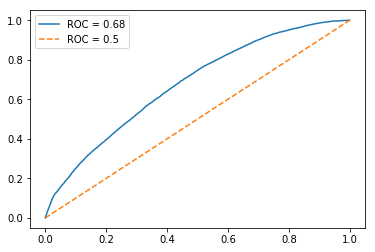

In [40]:
plt.plot(fpr, tpr, label='ROC = %0.2f' % roc_auc_score(ytest, soft.T[1]))
plt.plot([0,1],[0,1], linestyle='--', label='ROC = 0.5')
plt.legend();

In [41]:
from sklearn.metrics import log_loss , roc_auc_score 
log_loss(ytest, hard), roc_auc_score(ytest, soft.T[1])

(5.856741008934769, 0.6762899940019035)

<font color="red">**Question 22:**
    <br>
    - Import the 'plot_lift' function from 'utils.py' and plot the lift curve. What is the lift of the first fifth of the population identified by the test?
    <br>
    -  Interpret it. 
</font>

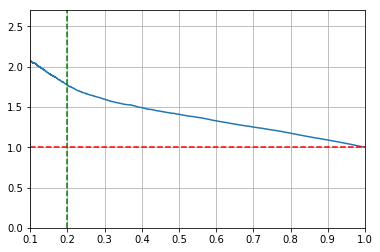

In [42]:
from utils import plotlift
plotlift(ytest, soft.T[1])
# The following line just plots a vertical line for you to answer the second part of the question
plt.axvline(x= 0.2 , linestyle='--', color='g')
plt.axhline(y= 1 , linestyle='--', color='r');

# Complete model

As an example, we now work on the 'site_id' column.
<font color="red">**Question 23:**
    <br>
    - For each modality, compute the number of occurrences in the dataset and the average of clicks for this modality 
    <br>
    - With 'sns.joiplot', represent the set of points (count, mean) for each modality
</font>

In [43]:
import seaborn as sns

/home/ubuntu/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/home/ubuntu/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


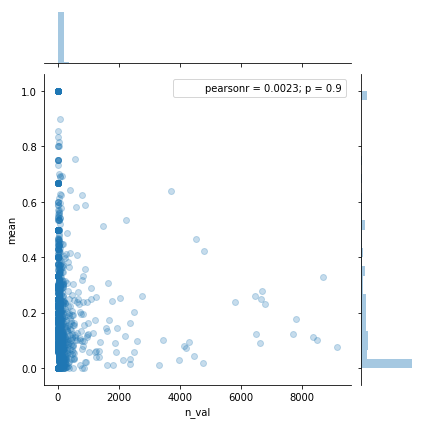

In [58]:
col = 'site_id'
a = pd.DataFrame([df.groupby(col).mean()['click'], df.groupby(col).count()['click']]).transpose()
a.columns = ['mean', 'n_val']
#sns.jointplot(a['n_val'], a['mean'], alpha=0.25);
thres = 10000
sns.jointplot(a[a['n_val']<thres]['n_val'], a[a['n_val']<thres]['mean'], alpha=0.25);

<font color="red">**Question 24:**
    In the above commands, what does the alpha parameter stand for?
</font>

Several sites with a lot of occurrences in the dataset have a click frequency very different from the mean. It is relevant to keep the column 'site_id' at least for the modalities for which 'count' is very high.
<font color="red">**Question 25:**
    Do the same work on the 'device_id' column. What do you notice? What could be the isolated point?
</font>

/home/ubuntu/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/home/ubuntu/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/home/ubuntu/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/home/ubuntu/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


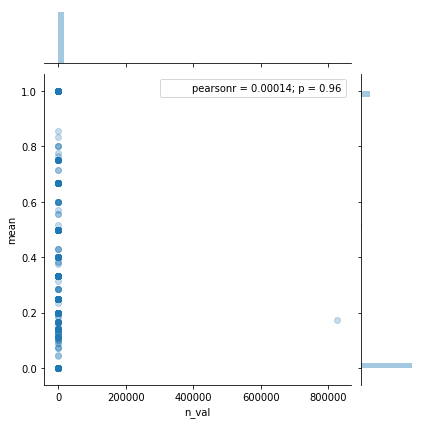

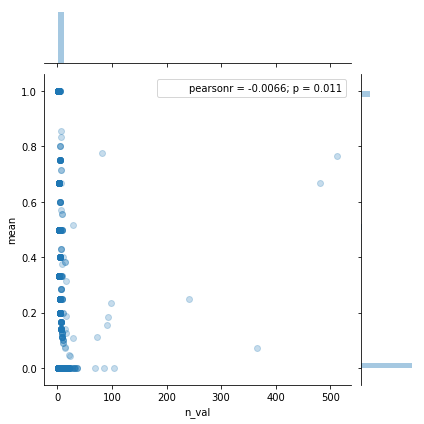

In [60]:
col = 'device_id' # Fill here
a = pd.DataFrame([df.groupby(col).mean()['click'], df.groupby(col).count()['click']]).transpose()
a.columns = ['mean', 'n_val']
sns.jointplot(a['n_val'], a['mean'], alpha=0.25);
thres = 10000
sns.jointplot(a[a['n_val']<thres]['n_val'], a[a['n_val']<thres]['mean'], alpha=0.25);

il y a un id_divice a été utilisé énormément, ce peut signifier un robot ou un attack.

<font color="red">**Question 26**:   
    In the column df['device_id'], spot the value V corresponding to the largest number of 'count' (using '.value_counts' method). Create a new column df['user'] defined as follows:
</font>
$$
\text{user} = \left\{\begin{array}[h]{ll} \text{device_ip + device_model} & \text{if device_id = V}\\ \text{device_id} & \text{else.}\end{array}\right.
$$

In [73]:
V = a['n_val'].idxmax() # Fill here
df['user'] = np.where(df['device_id']==V, df['device_ip'] + df['device_model'], df['device_id']) # Fill here

In [75]:
df[['device_id','device_ip', 'device_model','user']].head(5)

,device_id,device_ip,device_model,user
0,a99f214a,fb6566d3,be87996b,fb6566d3be87996b
1,9b7af851,ac5a4a77,7e6190f3,9b7af851
2,a99f214a,748e298a,3c55fad5,748e298a3c55fad5
3,a99f214a,a50da3d4,c5cc73c1,a50da3d4c5cc73c1
4,a99f214a,d5f88679,a5bce124,d5f88679a5bce124


<font color="red">**Question 27**:
    Drop the following columns: 'device_id','device_model','device_ip'
</font>

In [79]:
df.drop(columns=['device_id','device_ip', 'device_model'], inplace =True)

<font color="red">**Question 28**:
    One could look at the similarity between 'site_id' and 'site_domain'. Merge those columns into a new 'site' column and delete the old 'site_id' and 'site_domain' columns.
</font>

In [83]:
np.mean(df['site_id'] == df['site_domain'])

0.0

In [84]:
df['site'] = df['site_id'] + df['site_domain']

In [87]:
df.drop(columns = ['site_id','site_domain'],inplace = True)

<font color="red">**Question 29**:
    Once again, split the modified DataFrame df into a train (90%) and a test set (10%) (with option: random_state = 100).
</font>

In [89]:
df.columns

Index(['id', 'click', 'hour', 'C1', 'banner_pos', 'site_category', 'app_id',
       'app_domain', 'app_category', 'device_type', 'device_conn_type', 'C14',
       'C15', 'C16', 'C17', 'C18', 'C19', 'C20', 'C21', 'weekday', 'user',
       'site'],
      dtype='object')

In [90]:
Xtrain, Xtest, ytrain, ytest = train_test_split(df.drop(['id', 'click'], axis=1), df['click'],test_size=0.1, random_state=100)

<font color="red">**Question 30**:
    Define a OneHotEncoder and then, 'fit_transform' the train set.
</font>

In [94]:
ohe = OneHotEncoder(handle_unknown='ignore')
Xtrain_oh = ohe.fit_transform(Xtrain) # Fill here

<font color="red">**Question 31**:
    Transform the test set. If an error occurs, analyze it and try to solve it. Which argument did you set ?
</font>

In [95]:
Xtest_oh = ohe.transform(Xtest) # Fill here

dans le train set, il n'existe pas certain modalité dans test set, donc on utilise handle_unknow='ignore' to ignore les nouveau modalité

<font color="red">**Question 32**:
    What is the new number of features?
</font>

In [96]:
Xtrain_oh.shape

(900000, 713334)

In [97]:
Xtest_oh.shape

(100000, 713334)

<font color="red">**Question 33**:
    How many modalities have been seen more than a 100 times?
</font>

In [125]:
# The following 'n_ones' vector below gives the number of '1' in each column/modality of the Xtrain_oh design matrix.
n_ones = np.array(Xtrain_oh.sum(axis=0))
np.sum(n_ones>100) # Fill here using 'n_ones'

1971

nous avons 1971 modalités ont plus de 100 occurence

The list 'cols_to_keep' below is used to store the indices of the modalities seen more than a 100 times. You can notice the use of the 'enumerate' function.

In [131]:
useful = [item for sublist in np.ndarray.tolist(n_ones>100) for item in sublist]# Fill here.
cols_to_keep = [i for i, x in enumerate(useful) if x] # Fill here.

<font color="red">**Question 34**:
    Using only our restriction on the 'cols_to_keep' columns, retrain a logistic regression model and compare its performance in terms of 'log_loss' and 'roc_auc_curve'.
</font>

In [144]:
lr = LogisticRegression(solver='newton-cg', max_iter=500)
lr.fit(Xtrain_oh[:,cols_to_keep],ytrain) #Fill here.

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=500, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='newton-cg',
          tol=0.0001, verbose=0, warm_start=False)

In [145]:
hard = lr.predict(Xtest_oh[:,cols_to_keep])

In [146]:
print("log_loss : ",metrics.log_loss(ytest, hard))
print("roc_auc_score : ",metrics.roc_auc_score(ytest, hard))

log_loss :  5.742423704024187
roc_auc_score :  0.5307430478310321


# Gradient Boosting Decision Trees

<font color="red">**Question 35**:
    <br>
    - Import GradientBoostingClassifier from scikit learn. 
    <br>
    - Initialize it using 50 estimators and a learning rate of 0.8. Set 'verbose=True' to monitor the progress of the algorithm.
    <br>
    - Fit it on the same columns 'cols_to_keep' of Xtrain_oh than for the previous logistic regression.
    <br>
    - Evaluate its performance as in the previous step.
</font>

In [147]:
from sklearn.ensemble import GradientBoostingClassifier
gb = GradientBoostingClassifier(n_estimators=50, learning_rate=0.8,verbose=True).fit(Xtrain_oh[:,cols_to_keep],ytrain)
# Fill here

      Iter       Train Loss   Remaining Time 
         1           0.8743            3.95m
         2           0.8646            3.75m
         3           0.8583            3.70m
         4           0.8535            3.59m
         5           0.8503            3.50m
         6           0.8464            3.42m
         7           0.8441            3.33m
         8           0.8418            3.26m
         9           0.8404            3.18m
        10           0.8383            3.10m
        20           0.8282            2.33m
        30           0.8234            1.55m
        40           0.8190           46.69s
        50           0.8163            0.00s


In [150]:
#hard = gb.predict(Xtest_oh)
soft = gb.predict(Xtest_oh[:,cols_to_keep])

print("log_loss : ",metrics.log_loss(ytest, soft))
print("roc_auc_score : ",metrics.roc_auc_score(ytest, soft))

log_loss :  5.753475432812743
roc_auc_score :  0.5278141281327835


<font color="red">**Question 36**:
    What does the 'gb.estimators_' output?
</font>

In [151]:
gb.estimators_

array([[DecisionTreeRegressor(criterion='friedman_mse', max_depth=3,
           max_features=None, max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, presort='auto',
           random_state=<mtrand.RandomState object at 0x7f3f2c082948>,
           splitter='best')],
       [DecisionTreeRegressor(criterion='friedman_mse', max_depth=3,
           max_features=None, max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, presort='auto',
           random_state=<mtrand.RandomState object at 0x7f3f2c082948>,
           splitter='best')],
       [DecisionTreeRegressor(criterion='friedman_mse', max_depth=3,
           max_features=None, max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, 

We now try to use the 'gb' classifier to generate features that will be relevant inputs for the logistic regression.
<font color="red">**Question 37**:
    With the 'gb.apply()' method, generate a transformation 'leafs_train' of the training set 'Xtrain_oh[:, cols_to_keep]' for which the nth column corresponds to the number of the leaf returned by the estimator n.
</font>

In [159]:
#gb.feature_importances_

In [161]:
gb.apply(Xtrain_oh[:, cols_to_keep]) # Fill here.

array([[[ 3.],
        [ 3.],
        [ 3.],
        ...,
        [ 3.],
        [ 3.],
        [ 3.]],

       [[ 3.],
        [ 3.],
        [ 3.],
        ...,
        [ 3.],
        [ 3.],
        [ 3.]],

       [[ 3.],
        [ 3.],
        [ 3.],
        ...,
        [ 3.],
        [ 3.],
        [ 3.]],

       ...,

       [[ 3.],
        [ 3.],
        [ 3.],
        ...,
        [ 3.],
        [ 3.],
        [ 3.]],

       [[ 3.],
        [ 3.],
        [ 3.],
        ...,
        [ 3.],
        [ 3.],
        [ 3.]],

       [[ 3.],
        [13.],
        [ 3.],
        ...,
        [ 3.],
        [ 3.],
        [ 3.]]])

After your applied gb.apply on Xtrain_oh[:, cols_to_keep], remember that use have only one class to predict (click = 0 or 1). 

In [183]:
leafs_train = pd.DataFrame(gb.apply(Xtrain_oh[:, cols_to_keep]).reshape(-1,50)) # Fill here
leafs_test = pd.DataFrame(gb.apply(Xtest_oh[:, cols_to_keep]).reshape(-1,50))

<font color="red">**Question 38**:
    Encode these new features into dummies.
</font>

In [ ]:
ohe = OneHotEncoder( ... ) # Fill here an argument if needed
leafs_train_oh = ...
leafs_test_oh = ...

<font color="red">**Question 39**:
    With the "hstack" function, create a new matrix of features by concatenating horizontally our new features "leafs_train_oh" and "leafs_test_oh", and previous features used for logistic regression (e.g. in "Xtrain_oh[:, cols_to_keep]").
</font>
<br><br>
**Remark**: we use "hstack" from scipy.sparse (and not from numpy) because the output of our OneHotEncoder is a sparse array. You can verify it with the command "type(Xtrain_oh)".

In [ ]:
from scipy.sparse import csr_matrix, hstack
Xtrain_concat = hstack([ ... , ... ]) # Fill here
Xtest_concat = ...

<font color="red">**Question 40**:
    Run a logistic regression on the new features and evaluate its performance as before.
</font>

In [ ]:
... # Fill here.

<font color="red">**Question 41**:
    <br>
    - Import XGBClassifier from xgboost package.
    <br>
    - Initialize it using the same number of estimators and learning rate as before. 
    <br>
    - Which value of n_jobs did you choose?
    <br>
    - Fit it on the same columns 'cols_to_keep' of Xtrain_oh than for the previous logistic regression.
    <br>
    - Evaluate its performance and compare it to the GradientBoosting classifier of scikit learn. How is the error? Does it take more time to run?
</font>

In [ ]:
from xgboost import ...
xgb = XGBClassifier( ... , ... , ... )
%time xgb.fit( ... )
...

<font color="red">**Question 42**:
    Increase the number of estimators (e.g. 1024) and visualize the impact on performance. You might have to adapt the learning rate.
</font>

In [ ]:
... # Fill here

# Features hashing and random forest

We restart with raw features before dummy encoding: Xtrain, Xtest.
<font color="red">**Question 43**:
    Display again the number of modalities per feature in Xtrain.
</font>

We want to define a transformation which regroups the least frequent modalities into a label 'isRare'. In order to do so, we decide to define our own Transformer.
<font color="red">**Question 44**:
    Understand the different steps of 'fit' and 'transform'.
</font>

In [ ]:
from sklearn.base import BaseEstimator, TransformerMixin

class MergeRareTransformer(BaseEstimator, TransformerMixin):
    
    def __init__(self, col_names, threshold):
        self.col_names = col_names
        self.threshold = threshold

    def fit(self, X, y=None):

        X = pd.DataFrame(X)
        counts_dict_list = []
        ################## READ THIS #########################
        for i in range(len(self.col_names)):
            
            serie = X[self.col_names[i]].value_counts()  # Série des counts de chaque modalité
            rare_indexes = serie[serie<self.threshold[i]].index  # A quoi correspondent ces indices ?
            frequent_indexes = serie[serie>=self.threshold[i]].index  # A quoi correspondent ces indices ?
            dico = {x:'isRare' for x in rare_indexes}
            dico.update({x: str(x) for x in frequent_indexes})
            counts_dict_list.append(dico)   # Quel est le dictionnaire obtenu ?
            
        ######################################################
            
        self.counts_dict_list_ = counts_dict_list
        return self

    def transform(self, X):

        Xt = pd.DataFrame()
        ################## READ THIS #########################
        for col, count_dict in zip(self.col_names, self.counts_dict_list_):
            Xt[col] = X[col].apply(lambda x:count_dict[x] if x in count_dict else 'isRare')
            # A quoi sert le "else 'isRare'" dans la transformation de la colonne ?
        ######################################################

        return Xt


<font color="red">**Question 45:**
    <br>
    - Fit and transform the training set. To do so, merge all mmodalities occuring at least 20 times in each column.
    <br>
    - Transform the test set.
</font>

In [ ]:
mg = MergeRareTransformer(col_names=Xtrain.columns, threshold=[20]*len(Xtrain.columns))
Xtrain_mg = ... # Fill here with fit_transform or fit then transform.
Xtest_mg = 

<font color="red">**Question 46:**
   How many elements of the column Xtrain_mg['app_domain'] are now labeled as 'rare'?
</font>

In [ ]:
... # Fill here

<font color="red">**Question 47:**
   In the new train set, display the number of modalities for each feature.
</font>

In [ ]:
... # Fill here

Modalities are arbitrary object, such as '234', 'isRare', etc. We will now transorm them into integers with the hashing trick.
<font color="red">**Question 48:**
   To better understand how the 'hash' function is working, apply it to a string of your choice.
</font>

In [ ]:
import hashlib
hash( ... ) # Fill here

<font color="red">**Question 49:**
   Create two new datasets 'Xtrain_ha' and 'Xtest_ha' containing the output of the hashing process. Use the '.apply' method to transform iteratively the columns by mapping to each value its remainder in the euclidean division of the hash by 1000000. 
   Example:
</font>
</font>
<p>
<center>
2060777048690<font color="red">918393</font>  -->  918393
</center>
Remark: do not forget that the function 'hash' has to take a string as input.

In [ ]:
Xtrain_ha = pd.DataFrame()
Xtest_ha = pd.DataFrame()
for col in Xtrain_mg.columns:
    Xtrain_ha[col] = Xtrain_mg[col].apply( ... ) # Fill here defining a lambda function
    Xtest_ha[col] = Xtest_mg[col].apply( ... )

<font color="red">**Question 50:**
   Visualize the content of the DataFrames you have obtained.
</font>

In [ ]:
... # Fill here

<font color="red">**Question 51:**
    <br>
    - Train a RandomForestClassifier on Xtrain_ha and evaluate its performance on Xtest_ha. One can chose 1024 estimators, min_samples_leaf=20 and verbose=1 in order to monitor the fitting step.
    <br>
</font>

In [ ]:
from sklearn.ensemble import ... # Fill here
rf = RandomForestClassifier( ... )
rf.fit( ... )

In [ ]:
soft = ...
log_loss(...), roc_auc_score(...)

<font color="red">**Question 52:**
   Compare with xgboost performance on the same hashed dataset.
</font>

In [ ]:
... # Fill here
%time xgb.fit( ..., ... ) # the '%time' command will return the execution time of the fitting step
...

<font color="red">**Question 53:**
    Plot the ROC and the lift curves for the obtained classifier (xgboost on hashed data).
</font>

In [ ]:
# Plot the lift curve here

In [ ]:
# Plot the ROC curve here

Hashing produces columns of integers arbitrarily ordered. One can wonder if adding more columns hashed in a different fashion would lead to better performance. 
<font color="red">**Question 54:**
    Add hashed columns by recursively hashing the previous ones: complete the following code. 
</font>

In [ ]:
Xtrain_haha = pd.DataFrame(Xtrain_ha).copy()
Xtest_haha = pd.DataFrame(Xtest_ha).copy()

n_hash = 3
cols = Xtrain_ha.columns
for l in range(n_hash):
    for col in cols:
        Xtrain_haha[col + '-hash'] = Xtrain_haha[col].apply( ... )
        Xtest_haha[col + '-hash'] = Xtest_haha[col].apply( ... )
    cols = [col + '-hash' for col in cols]

<font color="red">**Question 55:**
    Evaluate the performance of a random forest and/or an xgboost clasifier on these enlarged dataset.
</font>

In [ ]:
... # Fill here

<font color="red">**Question 55:**
    Compare the different models used in the TP.
</font>

Good job! :-) 